In [38]:
import os 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import scipy

### Exploratory Data Analysis

**Loading Data for analysis**

In [3]:
booking_df = pd.read_csv("data/hotel_booking.csv")

In [4]:
booking_df.shape,booking_df.columns

((119390, 36),
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type',
        'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
        'company', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date', 'name', 'email',
        'phone-number', 'credit_card'],
       dtype='object'))

In [5]:
booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:

booking_df.info()  #learning object datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
booking_df['reservation_status_date'] = pd.to_datetime(booking_df['reservation_status_date'])

In [15]:
# List of Categorical variables
for col in booking_df.describe(include = "object").columns:
    print(col)
    print(booking_df[col].unique())
    print('*'*70)

hotel
['Resort Hotel' 'City Hotel']
**********************************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
**********************************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
**********************************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LK

**Handling Null values**

In [16]:
booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
booking_df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [21]:
booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [23]:
booking_df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [24]:
# Distribution of Average daily Rates across hotels
booking_df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Cancellation count')

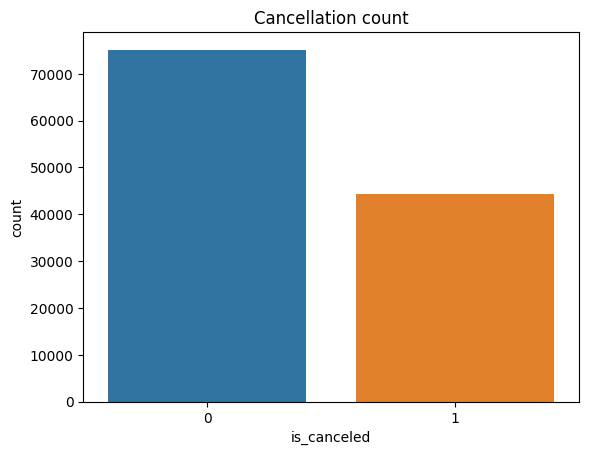

In [28]:
sns.countplot(data=booking_df,x='is_canceled')
plt.title('Cancellation count')

Text(0.5, 1.0, 'Cancellation across hotel types')

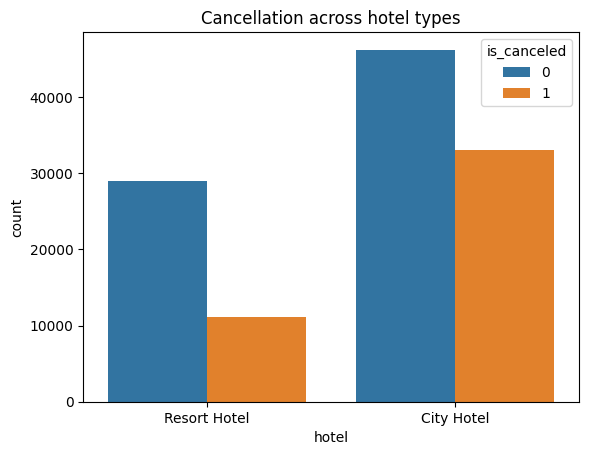

In [31]:
# Cancellation across different types of Propoerties 
sns.countplot(data=booking_df,x='hotel',hue='is_canceled')
plt.title('Cancellation across hotel types')

In [49]:
resort_hotel = booking_df[booking_df['hotel']=='Resort Hotel'].groupby('reservation_status_date')[['adr']].mean()
city_hotel = booking_df[booking_df['hotel']=='City Hotel'].groupby('reservation_status_date')[['adr']].mean()

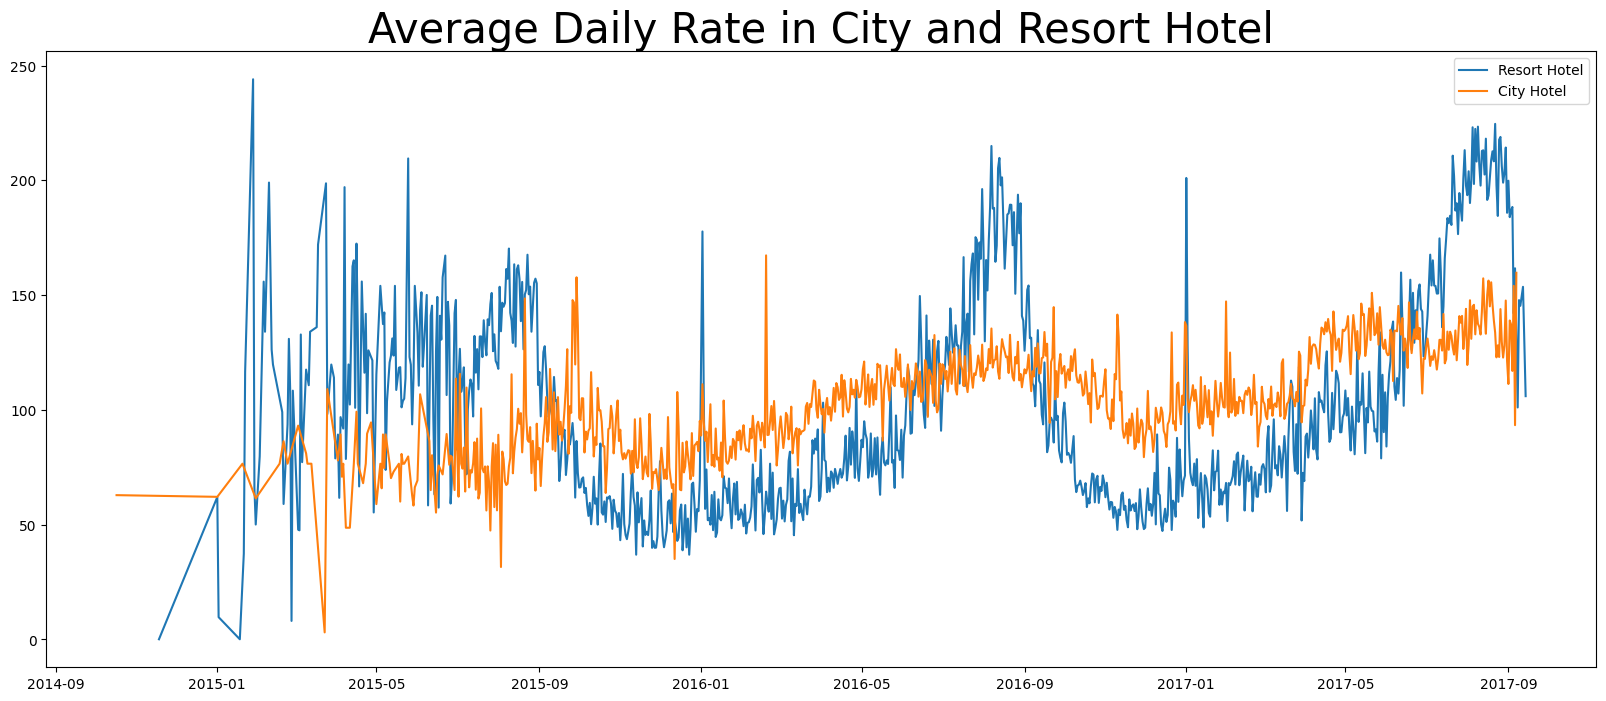

In [50]:
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label="Resort Hotel")
plt.plot(city_hotel.index, city_hotel['adr'], label="City Hotel")
plt.legend()
plt.show()

<AxesSubplot: xlabel='reservation_status_date', ylabel='adr'>

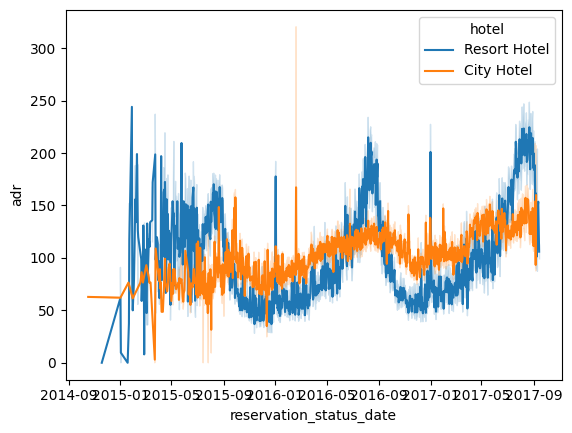

In [53]:
sns.lineplot(data=booking_df,x='reservation_status_date',y='adr',hue='hotel')

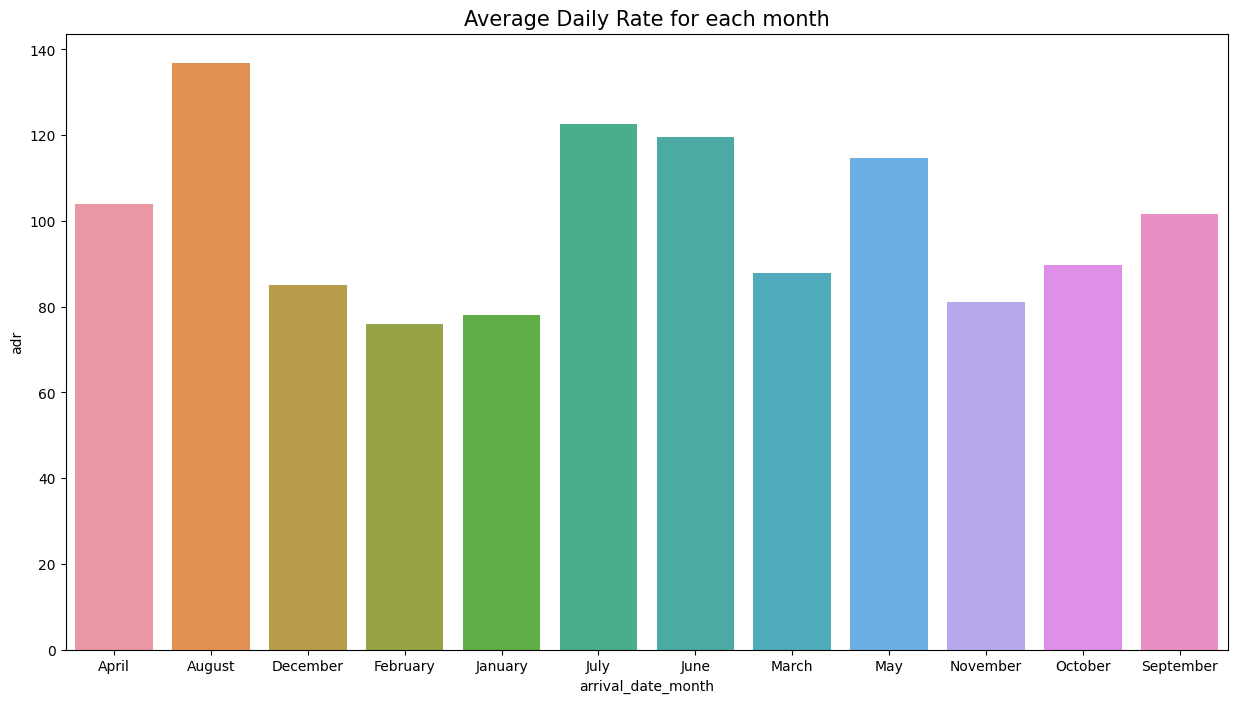

In [60]:
plt.figure(figsize=(15, 8))
plt.title('Average Daily Rate for each month', fontsize=15)
canceled_reservations = booking_df[booking_df['is_canceled'] == 1]
monthly_adr = canceled_reservations.groupby('arrival_date_month')['adr'].mean().reset_index()
sns.barplot(x='arrival_date_month', y='adr', data=monthly_adr)
plt.show()

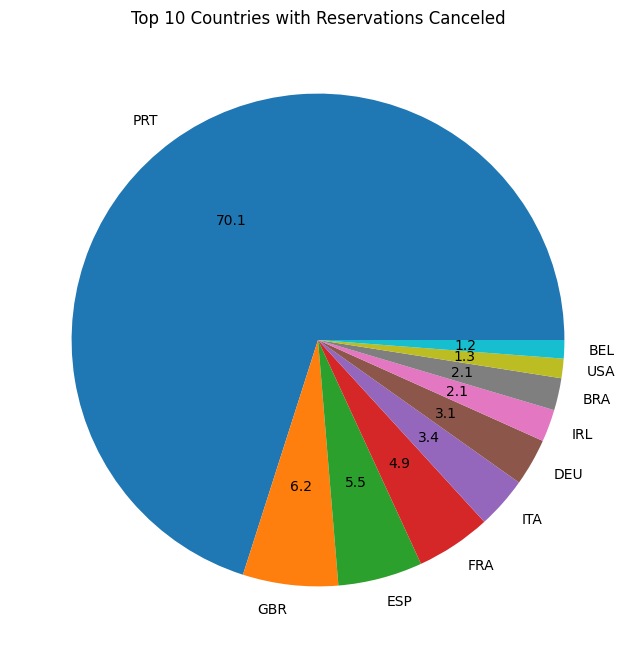

In [65]:
cancelled_data = booking_df[booking_df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservations Canceled')
plt.pie(top_10_country, autopct='%.1f', labels=top_10_country.index)
plt.show()


In [67]:
booking_df['market_segment'].value_counts(dropna=False)

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [70]:
booking_df['babies'].value_counts(dropna=False)

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [74]:
booking_df[booking_df['babies'] == 0]['adr'].describe()

count    118473.000000
mean        101.691794
std          50.412678
min          -6.380000
25%          69.000000
50%          94.500000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [75]:
booking_df[booking_df['babies'] != 0]['adr'].describe()

count    917.000000
mean     119.831668
std       61.944816
min        0.000000
25%       75.000000
50%      111.670000
75%      158.950000
max      329.000000
Name: adr, dtype: float64

**Comparison of average Daily rate distribution across customers with/without babies**

In [77]:
scipy.stats.ks_2samp(booking_df[booking_df['babies'] == 0]['adr'],booking_df[booking_df['babies'] != 0]['adr'])

KstestResult(statistic=0.17812546147362407, pvalue=9.918432818441392e-26)

_A p value of less than .05 suggests that the two distributions are NOT identical and the price ranges of properties opted by customers with and without babies aren't comparable_

### Prediction of Room Cancellation using Random Forest Classifier

In [8]:
booking_df_new = booking_df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type',
        'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
        'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date']]

In [9]:
booking_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [14]:
for c in booking_df_new.select_dtypes(include=['object']):
    print(c)
    print(booking_df_new[c].unique())
    le = sklearn.preprocessing.LabelEncoder()
    booking_df_new[c] = le.fit_transform(booking_df_new[c])
    print(booking_df_new[c].unique())
    print('*'*70)    

hotel
['Resort Hotel' 'City Hotel']
[1 0]
**********************************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
[ 5  1 11 10  9  2  4  3  7  0  8  6]
**********************************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
[0 1 2 3 4]
**********************************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' '

C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2983615783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_new[c] = le.fit_transform(booking_df_new[c])
C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2983615783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_new[c] = le.fit_transform(booking_df_new[c])
C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2983615783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
[1 0 3 4 2]
**********************************************************************
reserved_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
[2 0 3 4 6 5 7 8 9 1]
**********************************************************************
assigned_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
[ 2  0  3  4  6  5  8  1  7 11 10  9]
**********************************************************************
deposit_type
['No Deposit' 'Refundable' 'Non Refund']
[0 2 1]
**********************************************************************
customer_type
['Transient' 'Contract' 'Transient-Party' 'Group']
[2 0 3 1]
**********************************************************************
reservation_status
['Check-Out' 'Canceled' 'No-Show']
[1 0 2]
**********************************************************************


C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2983615783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_new[c] = le.fit_transform(booking_df_new[c])
C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2983615783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_new[c] = le.fit_transform(booking_df_new[c])
C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2983615783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [15]:
booking_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  int32         
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int32         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [31]:
booking_df_new['agent'].fillna(booking_df_new['agent'].median(), inplace=True)
booking_df_new['children'].fillna(booking_df_new['children'].median(), inplace=True)
booking_df_new.isnull().sum()

C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2843677903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_new['agent'].fillna(booking_df_new['agent'].median(), inplace=True)
C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2843677903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_new['children'].fillna(booking_df_new['children'].median(), inplace=True)


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [46]:
booking_df_new.corr()

C:\Users\shara\AppData\Local\Temp\ipykernel_19540\3552268686.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  booking_df_new.corr()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.000000,-0.136531,-0.075381,-0.035267,-0.035378,-0.001270,0.001862,0.186596,0.234020,0.013183,...,0.307834,0.072820,-0.159021,0.665042,-0.072432,-0.047531,-0.096719,0.218873,0.043390,0.124331
is_canceled,-0.136531,1.000000,0.293123,0.016660,-0.001491,0.008148,-0.006130,-0.001791,0.024765,0.060017,...,-0.176028,-0.144381,0.468634,-0.051711,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196
lead_time,-0.075381,0.293123,1.000000,0.040142,0.086228,0.126871,0.002268,0.085671,0.165799,0.119519,...,-0.172219,0.000149,0.375667,-0.020967,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.251837,-0.540561,-0.000221,0.021497,0.030883,0.029635,...,0.036141,0.030872,-0.064714,0.057134,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683
arrival_date_month,-0.035378,-0.001491,0.086228,-0.251837,1.000000,0.302228,-0.017938,-0.031869,-0.025746,-0.058284,...,-0.038134,-0.017854,0.068173,-0.040683,0.048357,0.012029,-0.109004,-0.018589,-0.053047,-0.001611
arrival_date_week_number,-0.001270,0.008148,0.126871,-0.540561,0.302228,1.000000,0.066809,0.018208,0.015558,0.025909,...,-0.005684,0.005508,0.003891,-0.019919,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,-0.017938,0.066809,1.000000,-0.016354,-0.028174,-0.001566,...,0.011646,0.010613,-0.001358,0.000388,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.021497,-0.031869,0.018208,-0.016354,1.000000,0.498969,0.091871,...,0.086643,0.063281,-0.111435,0.157568,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558
stays_in_week_nights,0.234020,0.024765,0.165799,0.030883,-0.025746,0.015558,-0.028174,0.498969,1.000000,0.092976,...,0.100795,0.096209,-0.076788,0.192090,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607
adults,0.013183,0.060017,0.119519,0.029635,-0.058284,0.025909,-0.001566,0.091871,0.092976,1.000000,...,0.144779,-0.051673,-0.027644,0.016803,-0.008283,-0.101756,0.230641,0.014785,0.122884,-0.071802


_Strong coorelation between reservation status and cancellation status and hence reservation status and date are not considered as parameters for training the model_

C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2033131843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(booking_df_new.corr())


<AxesSubplot: >

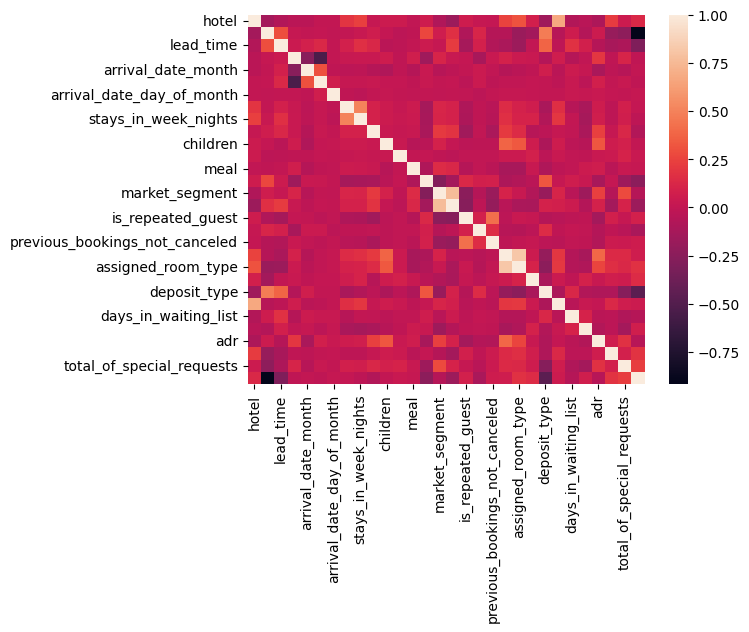

In [45]:
sns.heatmap(booking_df_new.corr())

In [47]:
X_train, X_test, y_train, y_test = train_test_split(booking_df_new.drop(['is_canceled', 'reservation_status_date', 'reservation_status'],1), booking_df_new['is_canceled'], test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

C:\Users\shara\AppData\Local\Temp\ipykernel_19540\2894530997.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(booking_df_new.drop(['is_canceled', 'reservation_status_date', 'reservation_status'],1), booking_df_new['is_canceled'], test_size=0.2)


((95512, 28), (95512,), (23878, 28), (23878,))

In [48]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
preds = clf.predict(X_test)

In [50]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15017
           1       0.89      0.83      0.86      8861

    accuracy                           0.90     23878
   macro avg       0.89      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878



In [51]:
# feature importance in descending order 
pd.DataFrame({'features':X_test.columns, 'importances':clf.feature_importances_}).sort_values(by="importances", ascending=False)

,features,importances
1,lead_time,0.131089
21,deposit_type,0.119376
12,country,0.110959
25,adr,0.072930
27,total_of_special_requests,0.055523
22,agent,0.054587
5,arrival_date_day_of_month,0.052671
4,arrival_date_week_number,0.049646
13,market_segment,0.046225
16,previous_cancellations,0.035029
